## Pattern identification in ride-sharing: from passenger preferences to the impact of external factors on rides

<span style="color:blue">**Project description:**</span> In this project, we work as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Our task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.

We'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Table of Contents

* [Step 4](#step4) Exploratory data analysis
* [Step 5](#step5) Hypothesis testing
    * [First test](#step5-1)
    * [Second test](#step5-2)
* [Step 6](#step6) General conclusions

<span style="color:blue">**Importing libraries:**</span> First, we import all code libraries and define output style functions we will be using in our project. 

In [1]:
# Import libraries and define output style functions.

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import stats module from scipy  
#      (url-> https://https://www.scipy.org/).
from scipy import stats as st

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# Import libraries to help read csv file from google drive 
import requests
from io import StringIO


<a class="anchor" id="step4"></a> 
### Step 4.  Exploratory data analysis

In the previous steps of this project, we worked the database on Platform and retrieved the following CSV file:
- `project_sql_result_07.csv` 

In addition to the data we retrieved from Platform, we've been given two additional files. We now have the following two CSVs:
- `project_sql_result_01.csv` 
- `project_sql_result_04.csv`

We are also handed the following information about the fields on these files:

<span style="color:blue">**project_sql_result_01**</span>  
- <span style="color:purple">**company_name:**</span> taxi company name;
- <span style="color:purple">**trips_amount:**</span> the number of rides for each taxi company on November
15-16, 2017. 

<span style="color:blue">**project_sql_result_04**</span>  
- <span style="color:purple">**dropoff_location_name:**</span>  Chicago neighborhoods where rides ended;
- <span style="color:purple">**average_trips:**</span> the average number of rides that ended in each neighborhood in November 2017.

<span style="color:blue">**project_sql_result_07**</span>  
- <span style="color:purple">**start_ts:**</span> pickup date and time;
- <span style="color:purple">**weather_condition:**</span> weather conditions at the moment the ride started;
- <span style="color:purple">**duration_seconds:**</span> ride duration in seconds.

Let us start by importing the files and studying the information about them.

In [2]:
# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform.
try:    # paths on local machine.
    result_01 = pd.read_csv('project_sql_result_01.csv') 
    result_04 = pd.read_csv('project_sql_result_04.csv') 
    result_07 = pd.read_csv('project_sql_result_07.csv') 
except:    # paths on Practicum100 platform.
    result_01 = pd.read_csv('/datasets/project_sql_result_01.csv') 
    result_04 = pd.read_csv('/datasets/project_sql_result_04.csv') 
    result_07 = pd.read_csv('/datasets/project_sql_result_07.csv') 
 

# Create a tuple from the dataframes.
data = (result_01, result_04, result_07) 
# Assign names to the dataframes
result_01.name = 'project_sql_result_01'
result_04.name = 'project_sql_result_04'
result_07.name = 'project_sql_result_07'

# Print a concise summary of the dataFrames with pandas.DataFrame.info() method.
for df in data:
    printmd("{}".format(df.name), color='blue')
    df.info()
    print()


<span style='color:blue'>project_sql_result_01</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



<span style='color:blue'>project_sql_result_04</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



<span style='color:blue'>project_sql_result_07</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB



From the printed information, we see that we do not have any null values in any of the dataframes. The first dataframe has $64$ entries in $2$ columns, the second one has $94$ entries in $2$ columns, and the third one has $1068$ entries in $3$ columns. The data takes very little memory space. Among the columns, we have
- $1$ columns of dtype 'int64': `trips_amount`;
- $2$ columns of dtype 'float64': `average_trips`, `duration_seconds`; 
- $4$ columns of dtype 'object': `company_name`, `dropoff_location_name`, `start_ts`, `weather_conditions`.

We see that the pickup dates and times are stored as strings in the `start_ts` column. So, we should change the column's data type to datetime objects. Before type conversion, let us also study the content populating each column.

In [3]:
# Display first and last five rows of the dataFrames. 
for df in data:
    printmd("{}".format(df.name), color='blue')
    display(df.head())
    display(df.tail())
    print()
    

<span style='color:blue'>project_sql_result_01</span>

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


<span style='color:blue'>project_sql_result_04</span>

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


<span style='color:blue'>project_sql_result_07</span>

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


We see that the pick up dates and times are stored in `%Y-%m-%d %H:%M:%S` format. Let us also check the summary statistics in the columns and the value counts of string objects. 

In [4]:
# Check summary statistics in the columns of the dataframes
for df in data:
    printmd(df.name, color='blue')
    for col in df:
        display(df[col].describe().to_frame())
        if type(col) == 'object':
            display(df[col].value_counts().to_frame())

        print()
        

<span style='color:blue'>project_sql_result_01</span>

,company_name
count,64
unique,64
top,5874 - 73628 Sergey Cab Corp.
freq,1


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


<span style='color:blue'>project_sql_result_04</span>

,dropoff_location_name
count,94
unique,94
top,Grand Crossing
freq,1


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


<span style='color:blue'>project_sql_result_07</span>

,start_ts
count,1068
unique,81
top,2017-11-11 10:00:00
freq,48


,weather_conditions
count,1068
unique,2
top,Good
freq,888


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Let us list our findings:
- Our dataframes contain data about $64$ different taxi companies. 
- The number of rides for each taxi company (on November $15$-$16$, $2017$, according to the description provided to us) ranges between $[2, 19558]$. The lower border of the range is suspiciously low. We do not know how taxi companies register for Zuber, but maybe some people just try out individually to offer their services and do not catch many rides. In addition, we observe that the mean number of rides is about $2145.5$ rides, while the median equals $178.5$. It is thus clear that the data contains large statistical outliers. However, we do not expect them to correspond to erroneous data, but to popular taxi companies. A taxi company can be popular because they have a lot of registered and well located cars ready to be booked at all times and under different external conditions (i.e., bad weather) and/or those who gathered very high customer satisfaction. Thus, these large statistical outliers should provide valuable information about our business partners. 
- Our dataframes contain data on $94$ different drop-off locations.
- The average number of rides that ended in each neighborhood (on November $2017$ according to the description provided to us) ranges between $[1.8, 10727.5]$. Therefore, there could be significant differences on the average popularity of the neighborhoods. In fact, the mean of the averages of the number of rides ending in each neighborhood is about $600$ rides. The median, on the other hand, is about $52$. Once again, we do have large statistical outliers in this data as well. However, we also do not expect them to indicate anomalies. These large outliers should correspond to very popular drop-off neighborhoods for our service. Thus, these large statistical outliers should provide valuable information about where our customers go to live/work/hang out/etc. 
- Our dataframes contain information on $1068$ rides from the Loop to O'Hare International Airport on sundays in November $2017$.
- As we know from the previous steps completed on the Platform, the weather conditions are grouped into two categories as `Good` and `Bad`. The majority of rides (about $83.15\%$) were taken on good weather.
- The data on the ride durations vary between $[0, 7440]$ seconds. Thus, the maximum ride took about $2$ hours, which  is quite large compared to the mean and median values, which are about $2071.7$ seconds and $1980$ seconds, respectively, making the average rides less than one third of the maximum observed ride duration. Some rides can take much longer due to inconvinient traffic conditions (bad weather, road blocked by accident), but we should investigate more to see if these very long ride durations make sense. On the other extreme, it is clear that no ride can take $0$ seconds. So, we might need to eliminate or replace ride durations that are too short or too long before hypothesis testing. We will further explore the suspicious ride durations in Step 5, before performing hypothesis testing.

Let us convert the data type of the `start_ts` column. Let us also create two new columns, one to store only the ride date and the other the pick-up time.

In [5]:
# Cast 'start_ts' column to datetime
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
result_07['start_date'] = result_07['start_ts'].dt.date
result_07['start_time'] = result_07['start_ts'].dt.time

# Display dataframe's information and first few rows
printmd(result_07.name, color='blue')
result_07.info()
result_07.head()


<span style='color:blue'>project_sql_result_07</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   object        
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.8+ KB


,start_ts,weather_conditions,duration_seconds,start_date,start_time
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00


Our dataframe should have only dates that correspond to sundays of November $2017$ as this is how we retrieved it after all. Nevertheless, let us check it.

In [6]:
# Display the counts of the values in the 'start_date' column
display(result_07['start_date'].value_counts().to_frame())


,start_date
2017-11-11,426
2017-11-04,367
2017-11-18,180
2017-11-25,95


This is indeed the case. Now, since the month and year attributes of the dates do not vary, let us also store, for convenience, the day of the month as a new column.

In [7]:
# Add a new date column to the dataframe by using pandas.Series.dt.day method
result_07['start_date'] = result_07['start_ts'].dt.day

# Display dataframe information with new column
printmd(result_07.name, color='blue')
result_07.info()


<span style='color:blue'>project_sql_result_07</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.8+ KB


It also looks like ride times were only recorded up to hours, Let us see if this is true.

In [8]:
# Display the counts of the values in the 'start_time' column
display(result_07['start_time'].value_counts().sort_index().to_frame())


,start_time
00:00:00,2
01:00:00,1
02:00:00,1
03:00:00,4
04:00:00,20
05:00:00,36
06:00:00,96
07:00:00,63
08:00:00,88
09:00:00,42


Indeed we do not have records for the minutes and seconds of the rides' start times. So, for convenience, let us also extract the hour and store it as a new column.

In [9]:
# Add a new hour column to the dataframe by using pandas.Series.dt.hour method
result_07['start_time'] = result_07['start_ts'].dt.hour

# Display dataframe information with new column
printmd(result_07.name, color='blue')
result_07.info()


<span style='color:blue'>project_sql_result_07</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.8+ KB


Now that we have studied the data and converted data types as necessary, let us identify the popular taxi companies and drop-off neighborhoods for our service.

First, we identify the top 10 neighborhoods in terms of the number of Zuber drop-offs and visualize their sizes and market shares among the available rides. 

In [10]:
# Identify the top 10 neighborhoods in terms of drop-offs.
top_10_neigh = (result_04.sort_values(by= 'average_trips', ascending=False)).head(10)
sum_others = result_04.loc[~result_04['dropoff_location_name'].isin(top_10_neigh['dropoff_location_name']), 
                           'average_trips'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
top_10_neigh = top_10_neigh.append({'dropoff_location_name': 'Other 84', 'average_trips':sum_others}, ignore_index=True)

# Round and convert to integer the count 
top_10_neigh['average_trips'] = top_10_neigh['average_trips'].round(0).astype('int')

# Display the top 10 neighborhoods in terms of drop-offs.
display(top_10_neigh)


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


We listed the top 10 neighborhoods as per the number of drop-offs and listed the aggregate number of drop-offs of the remaining 84 neighborhoods under the name 'Other 84'. We observed that the most popular neighborhoods are Loop and River North with around 10000 drop-offs. They are followed by Streeterville and West Loop with around 6500 and 5000 drop-offs, respectively. All remaining neighborhoods in the top 10 list had between 1000 to 2600 dropoffs. There were 13146 drop-offs taking place outside the top 10, making on average 156.5 drop-offs per each of the 84 neighborhoods. We proceed with visualizations.

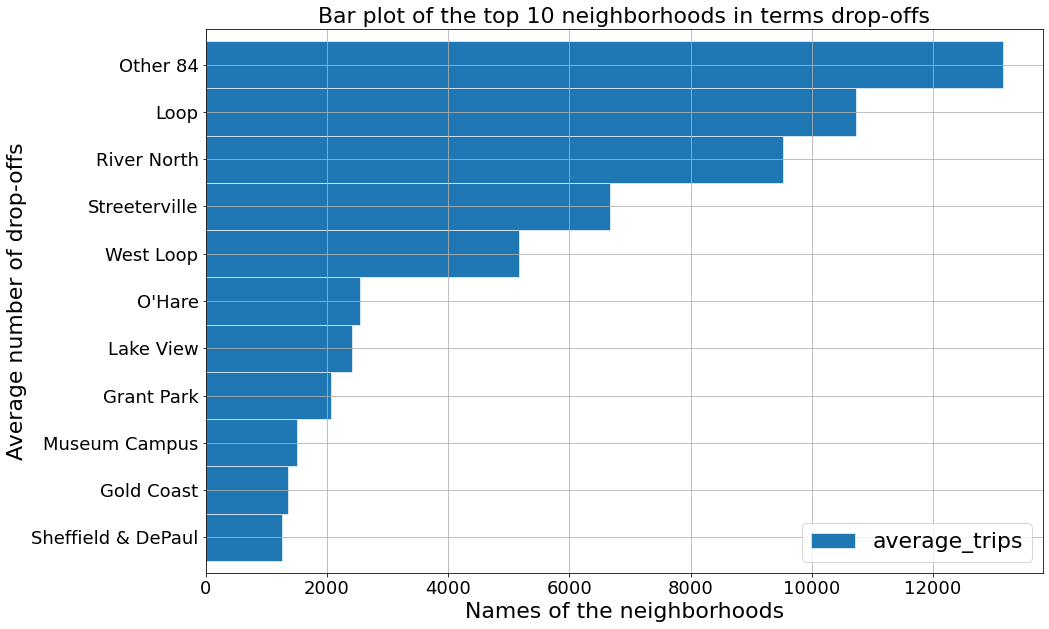

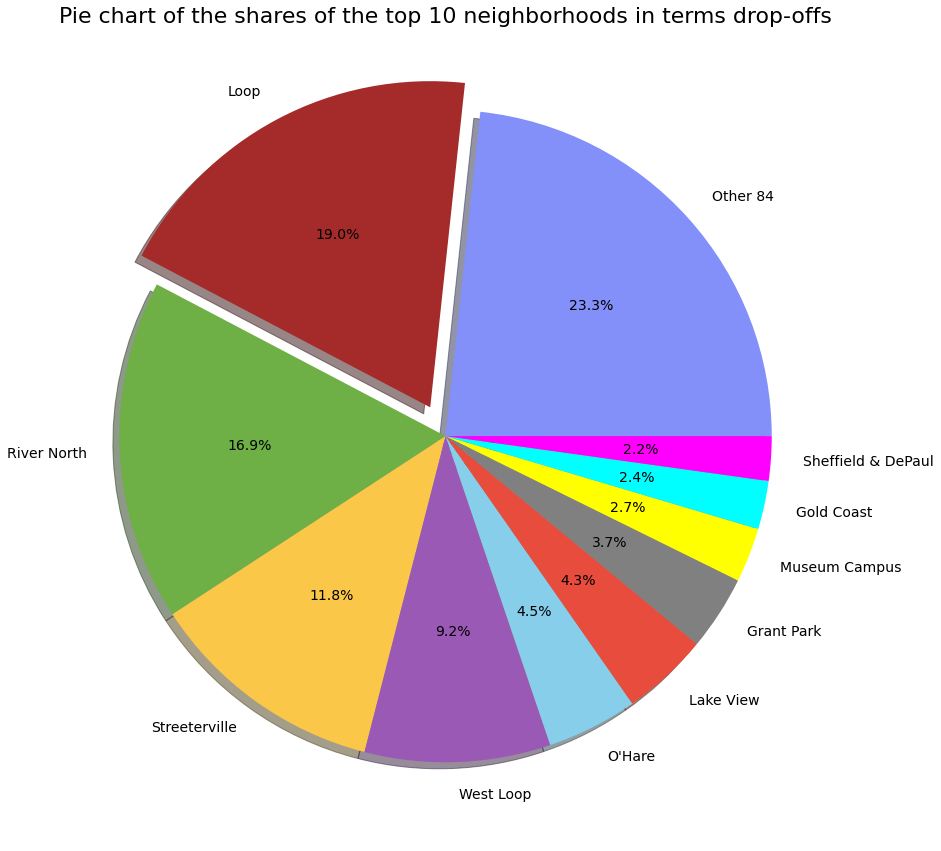

In [11]:
# Plot a bar graph
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips') # Reverse the order for the graph.
ax = top_10_neigh.set_index('dropoff_location_name').plot.barh(grid=True, figsize=(15, 10), width=1,
                                                              edgecolor='white', linewidth=0.6)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the top 10 neighborhoods in terms drop-offs', fontsize=22)
ax.set_xlabel('Names of the neighborhoods', fontsize=22)
ax.set_ylabel('Average number of drop-offs', fontsize=22)
ax.legend(fontsize=22)
plt.show()
print()
# Add the share of rides for each neighborhood in percentage.
top_10_neigh['trips_pct'] = (top_10_neigh['average_trips']/ sum(top_10_neigh['average_trips'])*100).round(1)

# Plot a pie chart
plt.figure(figsize=(15,15))
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips', ascending=False) # Reverse the order for the graph.

top_10_neigh_list = ['Other 84', 'Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

colors =  ['#8390FA', 'brown', '#6EAF46', '#FAC748', "#9b59b6", "skyblue",
           '#e74c3c', 'grey', 'yellow', 'cyan', 'magenta']
plt.pie(top_10_neigh['trips_pct'].head(11), explode=explode, colors = colors,
              labels=top_10_neigh_list, autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, startangle=0)
plt.title('Pie chart of the shares of the top 10 neighborhoods in terms drop-offs', fontsize=22)

plt.show()


From the pie chart, we see that slightly more than one-third of the market share goes to the two most popular neighborhoods. The top 4 got half of the market share, while the 'Other 84' got slightly less than one quarter.

Next, we plot the taxi companies by their number of rides.

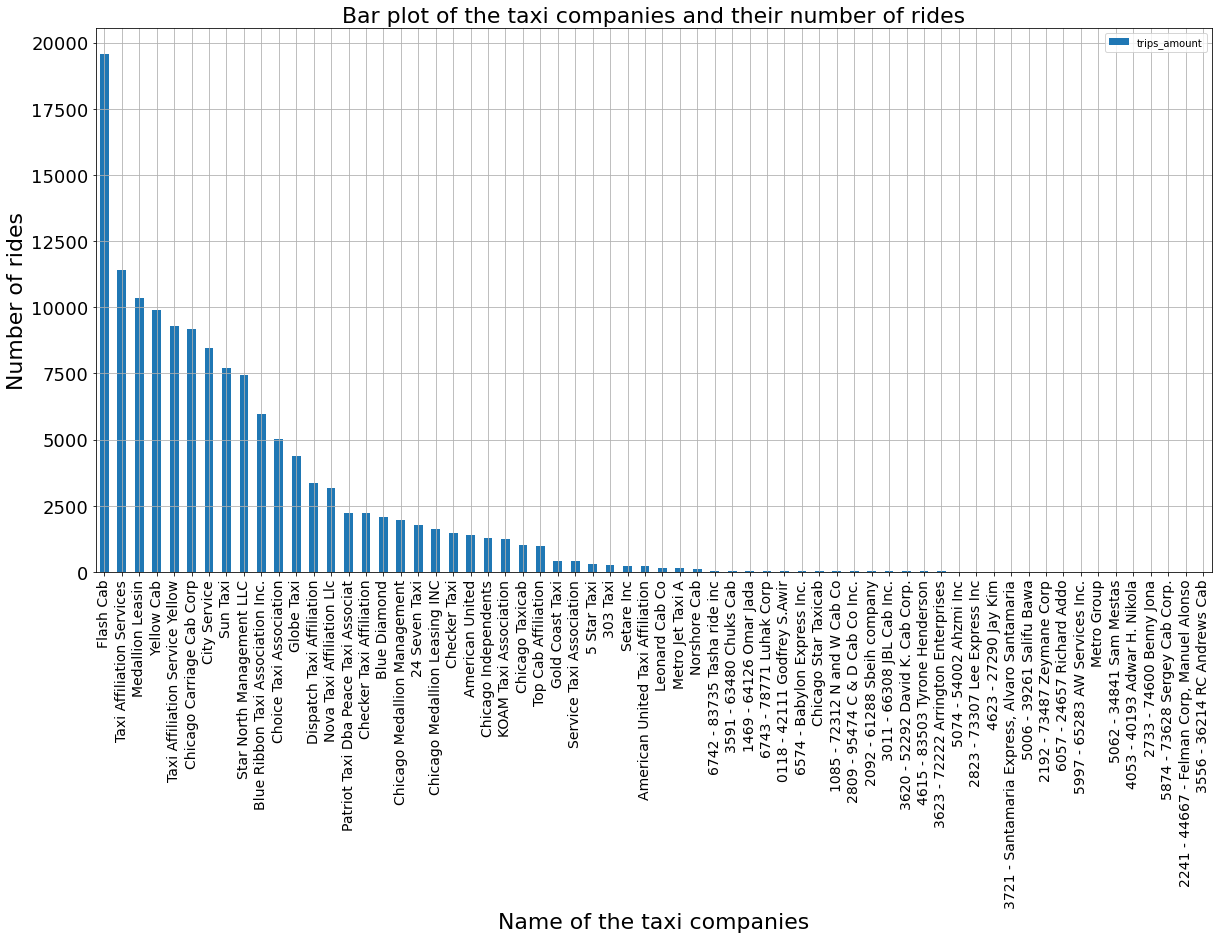

In [12]:
# Plot a bar graph

ax = result_01.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Name of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)

plt.show()


We can see that the number of recorded rides for about half of the taxi companies are not significant. So, let us replot the graph for the 35 busiest taxi companies.

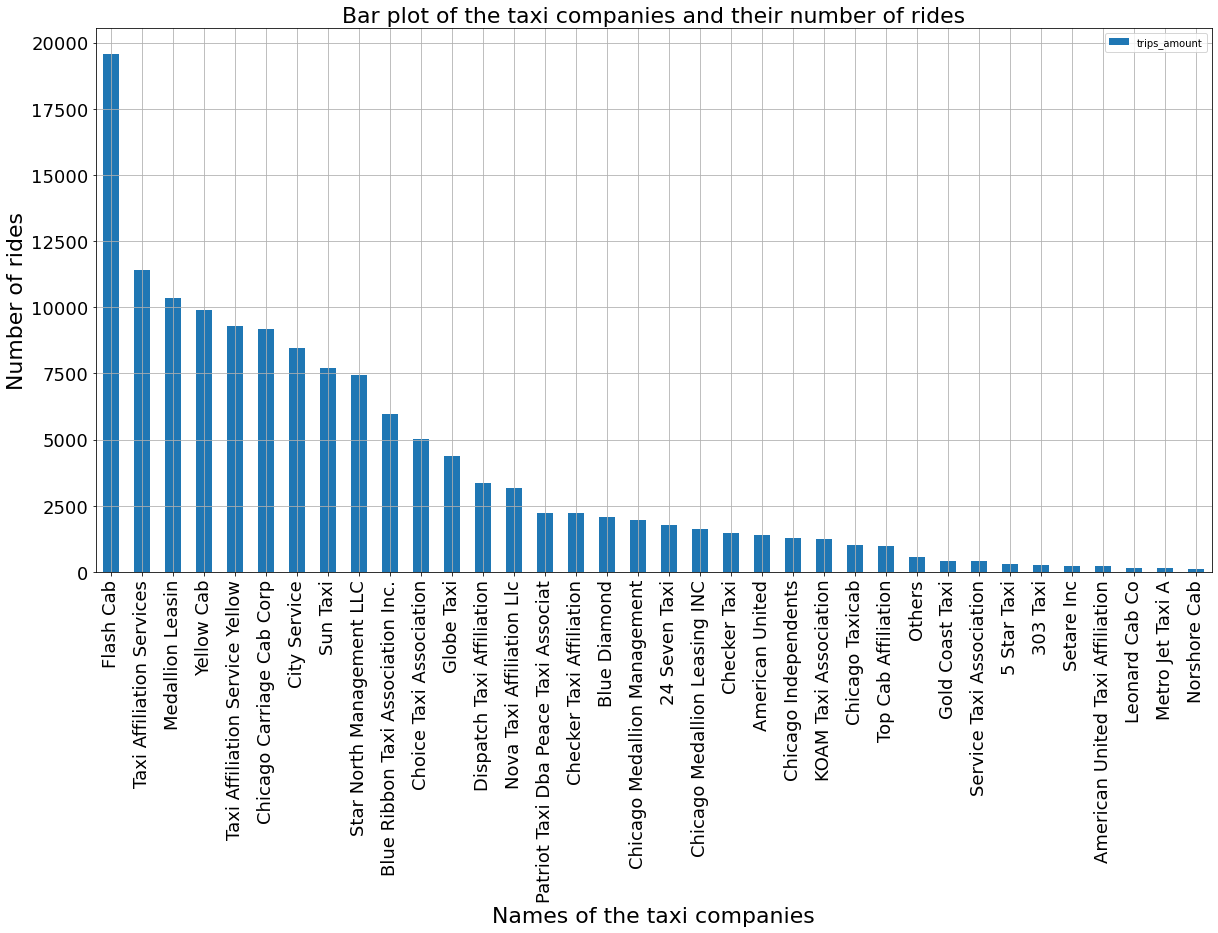

In [13]:
busiest_35 = result_01.sort_values(by='trips_amount', ascending=False).head(35)

sum_others = result_01.loc[~result_01['company_name'].isin(busiest_35['company_name']), 
                           'trips_amount'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
busiest_35 = busiest_35.append({'company_name': 'Others', 'trips_amount':sum_others}, 
                               ignore_index=True).sort_values(by='trips_amount', ascending=False)

ax = busiest_35.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Names of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)

plt.show()


Let us also list the companies which made it above the 5000 rides threshold.

In [14]:
# Display head rows from the dataframe
display(busiest_35.head(11))


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


We observe that Flash Cab is our most active partner with almost 20000 rides. It is followed by Taxi Affiliation Services getting slightly more rides than half as many as Flash Cab. The name 'Affiliation Service' or 'Taxi Association' points to it seems that some of our business partners are actually affiliate networks. Googling, we found one description from http://www.hypewriter.com.au/affiliate-marketing/what-is-an-affiliate-network/ as:

"An Affiliate Network, is a company who is dedicated to connecting merchants with affiliates and tracking all of the sales, leads, commissions etc as well as managing the branding links, banners, videos etc for the merchants."

Ideally we should correspond with our business colleagues to get more information about how these networks operate. But the reason why some companies dominate the market is now more clear: they are networks of smaller taxi companies. Quoting from the history of the development of Flash Cab at https://flashcab.com/about-us/:

"FLASH expanded the fleet by both attracting drivers and acquiring smaller cab companies, such as PUBLIC TAXI SERVICE. The name was modified as time went on, first as VETERANS FLASH CAB, then RADIO FLASH CORP., and finally to today’s moniker, FLASH CAB CO. FLASH, as it continues today, was always eager to integrate new, top of the line technology, consistently offering Chicago a better taxi dispatch service. 

Cab drivers wanted to be affiliated with a taxi service owned and led by one of their own. The respectable ‘old cab driver’, as Mr. Dickholtz was fondly referred to, knew how the cab business operated and how to serve both the passenger and the driver. As the old saying goes, know thy business and you will succeed.

Arthur Dickholtz passed away in May of 1988, but his dreams for FLASH and its affiliates have lived on. As the FLASH torch was passed on to its current owners, FLASH CAB CO. continued to incorporate cutting edge technology, maintain driver support systems, and add management services for today’s business world. The old cab driver would have been proud to see that the company he started has matured to what it is today, dispatching taxis to thousands of people all over Chicago, (in a flash!)." 

**Concluding Remarks:** In this step, we brought to our workspace datasets containing information on Zuber ride-sharing data for November 2017. After we analyzed the content populating the columns of the datasets, we identify that the date columns stored as strings should be converted to datetime objects. We also indentify the presence of some statistical outliers and discussed about them, except for those concerning ride durations, which we left for the next step. 

After we assessed the quality of the data, we went on to discover the most popular taxi companies and drop-off neighborhoods. The visualizations we made from the data show that there are large variations in the share of taxi companies and drop-off neighborhoods. Few companies, such as Flash Cab, and few neighborhoods, such as Loop and River North, listed at the top perform significantly better than the rest. 

<a class="anchor" id="step5"></a> 
### Step 5. Hypothesis testing

In this step, we are required to test the following hypothesis:
- **Hypothesis:** The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays.

We note that the statement of the hypothesis is rather vague. Should we group the data according to the weather condition 'Good' and 'Bad' to generate our two sets of ride duration samples? Or, should we consider the fact that a day is rainy when it rains at least once, and group all the rides on sundays where the weather conditions were 'Bad' for at least an hour? 

As there are no colleagues that can help us clarify the task, we will explore here both of these aforementioned options and discuss their limitations when performning the tests. 

We start by discussing which test we will use to test both hypotheses. Note that in both cases, we will be testing whether the sample means of two populations from the dataset are equal or differ. In such cases, one of the most commonly used test is the t-test and we will use this test. The t-test is sensitive to outliers because it is based on the sample mean and the sample variance of the sample values. Therefore, before using the test, it is very important we study the statistical outliers.

<a class="anchor" id="step5-1"></a> 
#### Step 5.1 First test

We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The average duration of rides from Loop neighborhood to O'Hare International Airport on Sunday hours are equal regardless the weather condition is 'Good' or 'Bad'.
- **Alternative Hypothesis:** The average duration of rides from Loop neighborhood to O'Hare International Airport differs on Sunday hours depending on 'Good' or 'Bad' weather conditions.

Let us analyze the statistical outliers via a scatter plot.

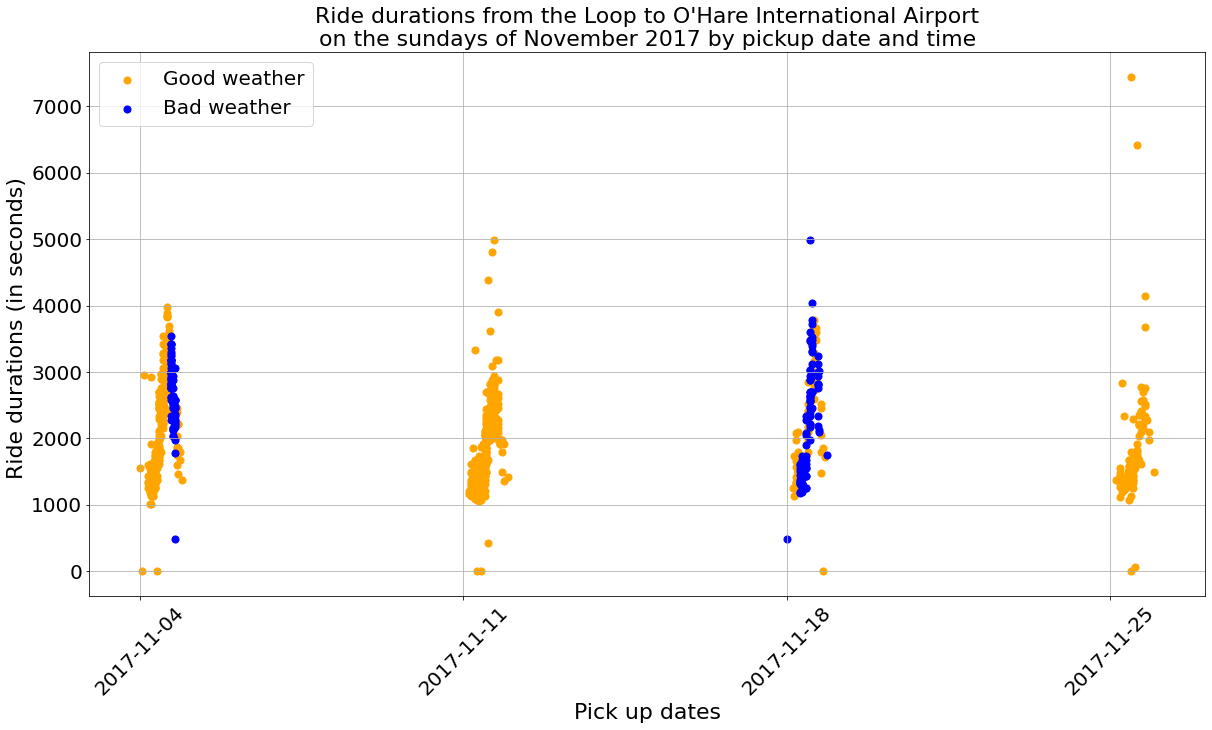

In [15]:
# Generate a scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


We can clearly observe in the above graph isolated points separated from the clusters. Let us summarize our observations related to these isolated points:
- There aren't too many isolated points;
- Few rides took about $0$ seconds. We know this is impossible. Perhaps, the rides were cancelled before the driver picked the customers up and such rides are recorded as 0 second rides. We should remove these rides from the data samples.
- Few rides took around $500$ seconds, which can be (based on the observed durations) at most halfway in a very optimistic scenario. Is it possible the ride was completed without any traffic obstacle (maybe night time) and riding faster, perhaps faster than speed limits? This is highly unlikely, but in any case such behavior should still be considered as an anomaly. Whatever the reason may be, these rides should be considered as errors and thus discarded from our data.
- There were few rides taking up to 1000 seconds (17 minutes) more than the maximum ride durations observed within the clusters. There were also few rides on the last Sunday that took about an hour or more than the maximum ride duration observed within the cluster. In theory, the much longer than usual rides could have been caused by extreme conditions (like an accident blocking the road). However, in that case we would have expected the rides that started within a certain time frame, say from the accident, to form a cluster as well. So, we don't think weather conditions or traffic conditions explain these much longer than usual rides. One possible explanation could be that these rides were much longer because they were shared by mutliple customers. Some taxi app offers ride-sharing among clients at a cheaper rate, so perhaps the first customer was picked up at Loop, but next another was picked up at a different neighborhood before heading to the Airport. It is also possible that the client forgot something important in the Loop neighborhood, like passport at home, and the driver had to go back to the pick up location before riding back to the airport. Since such rides would be atypical, we also need to remove them from our hypothesis test samples.

Let us now list the unreasonably short and much longer than usual rides we have just discussed.

In [16]:
# Filter outliers, store them separetely, and display them
outliers_short = result_07.loc[result_07['duration_seconds'] < 1000]
display(outliers_short)

outliers_long = result_07.loc[result_07['duration_seconds'] > 4000]
display(outliers_long)


,start_ts,weather_conditions,duration_seconds,start_date,start_time
15,2017-11-25 13:00:00,Good,60.0,25,13
163,2017-11-11 09:00:00,Good,0.0,11,9
168,2017-11-11 07:00:00,Good,0.0,11,7
203,2017-11-18 00:00:00,Bad,480.0,18,0
204,2017-11-18 19:00:00,Good,0.0,18,19
424,2017-11-11 13:00:00,Good,420.0,11,13
552,2017-11-04 01:00:00,Good,0.0,4,1
801,2017-11-04 09:00:00,Good,0.0,4,9
860,2017-11-04 18:00:00,Bad,480.0,4,18
1063,2017-11-25 11:00:00,Good,0.0,25,11


,start_ts,weather_conditions,duration_seconds,start_date,start_time
79,2017-11-11 15:00:00,Good,4800.0,11,15
110,2017-11-18 13:00:00,Bad,4044.0,18,13
276,2017-11-18 12:00:00,Bad,4980.0,18,12
353,2017-11-25 18:00:00,Good,4140.0,25,18
354,2017-11-25 11:00:00,Good,7440.0,25,11
583,2017-11-11 16:00:00,Good,4980.0,11,16
619,2017-11-25 14:00:00,Good,6420.0,25,14
646,2017-11-11 13:00:00,Good,4380.0,11,13


Then, we drop these outliers from our test data.

In [17]:
# Drop outliers from samples
outlier_list = list(outliers_short.index) + list(outliers_long.index)
print(outlier_list)

result_07_typ = result_07.drop(outlier_list)
result_07_typ.info()


[15, 163, 168, 203, 204, 424, 552, 801, 860, 1063, 79, 110, 276, 353, 354, 583, 619, 646]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1050 non-null   datetime64[ns]
 1   weather_conditions  1050 non-null   object        
 2   duration_seconds    1050 non-null   float64       
 3   start_date          1050 non-null   int64         
 4   start_time          1050 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 49.2+ KB


Time to perform our test. The scipy library has the testing algorithm implemented, so we need not worry about coding that. However, we need to discuss which values to set for two variables. The first one is the critical value alpha which is specified to set the sample significance level of the hypothesis test. Here we will set it to $5\%$. The second one is the 'equal_var' argument of the testing algorithm. If we believe that the samples are taken from populations with similar parameters, we should set the 'equal_var' argument to True. Otherwise, we should set it to False. We will set this argument as follows. For each sample group, we will compute the empirical variance, and then, if these variances do not differ more than $5\%$, we will set the value to True. If the difference is larger, we will set it to False.

In [18]:
# Test Hypothesis

# Get results
results_bad = result_07_typ.loc[result_07_typ['weather_conditions']=='Bad']
results_good = result_07_typ.loc[(result_07_typ['weather_conditions']=='Good')]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()


# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_1)
pct_c2 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_2)

if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
# results = st.ttest_rel(sample_1, sample_2)



print('Sample mean of ride durations in "Bad" weather:', 
      '{} seconds'.format(np.mean(sample_1).round(0).astype('int')))
print('Sample mean of ride durations in "Good" weather:', 
      '{} seconds'.format(np.mean(sample_2).round(0).astype('int')))
print()
print('eq_var argument of t-test set to:', eq_var)
print()
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

Sample mean of ride durations in "Bad" weather: 2426 seconds
Sample mean of ride durations in "Good" weather: 1994 seconds

eq_var argument of t-test set to: False

p-value:  1.083629710157954e-13
We reject the null hypothesis


We observe that the sample means of ride durations in 'Bad' and 'Good' weather times are different. According to the result of our test, there is almost zero ($1.08$e$^{-14}\%$) probability of randomly getting a difference that size or larger. We can thus reject the null hypothesis and conclude that there is a significant difference between the average ride durations of rides taking place when the weahter if 'Good' and when it is 'Bad'.

We performed a first hypothesis test grouping the data into 'Good' and 'Bad' weather samples. However, as we will illustrate now, this approach can be misleading as it does not account for other potential external factors that could be at play. In other words, maybe it wasn't the bad weather (alone or at all) at the root of longer ride durations, but peak hours (at which the waether was also bad by chance). Let us plot again a scatter plot (without the removed points) and make additional observations from it.

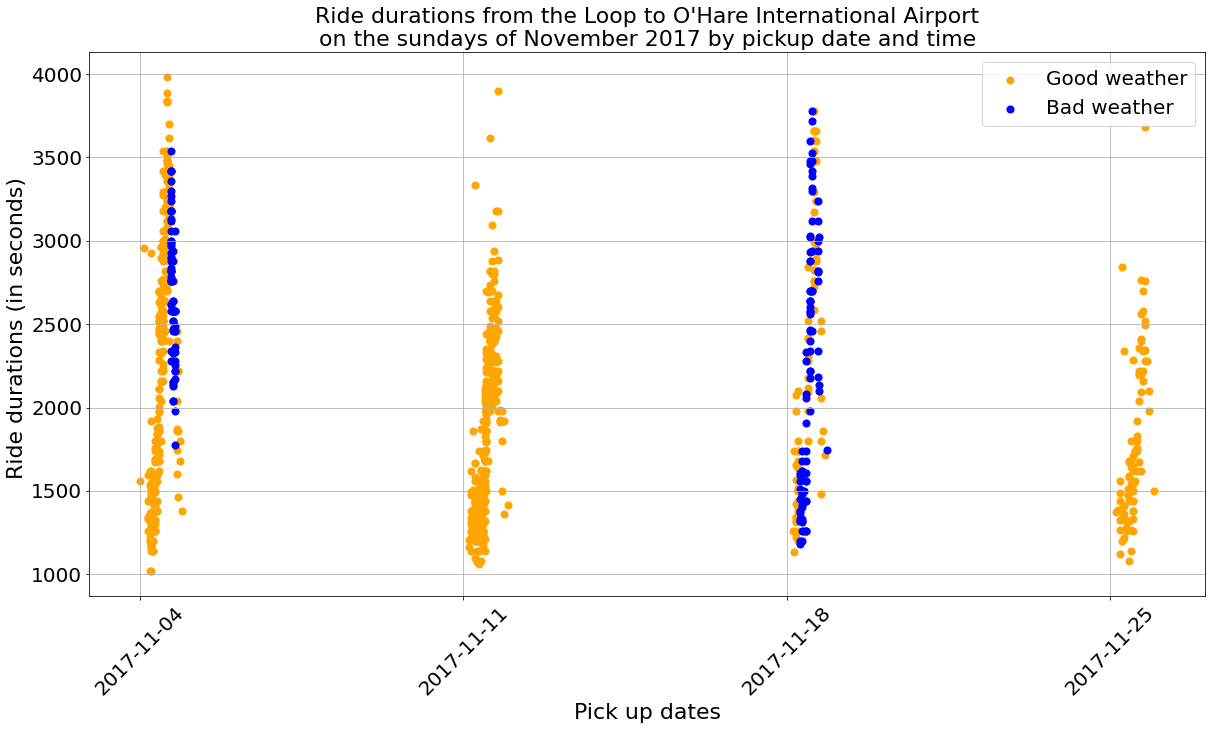

In [19]:
# Generate scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


For each Sunday, we see an elongated cluster of points. We can make the following observations on them:
- The lower limit of the data clusters occurs around 1000 seconds. This corresponds to about 17 minutes. 
- The ride durations within clusters can take up to 3 times longer than the lower limit.
- When we look in the 3000 to 4000 seconds band, we see that there are much more rides that happened to last that long on the first and third Sundays of November $2017$ compared to the second and fourth. The upper limit of the first and third clusters corresponds to about 67 minutes, while the upper limit for the second and fourth clusters corresponds to about 50 minutes. 
- Interestingly, the first and third clusters correspond to rainy Sundays, even though the weather is not necessarily tagged as 'Bad' in all of the rides. In fact, both the orange and blue clusters corresponding to 'Good' and 'Bad' weather conditions, respectively, are elongated in form.

To sum up, we draw two conclusions. On one hand, there are variations in ride durations within each cluster. Moreover, weather conditions do not seem to be the main cause of in-cluster variations, as both blue points and orange points do cluster in an elongated form. So, the scatter plot suggests that there should be some other external factors affecting the ride durations. This is, in fact, not very surprising. Ride durations vary depending on peak hours as we must all have experienced. Checking google maps a cloudy weekday (with possibility of rain) at 10:00, the fastest route is suggested to take 21 minutes driving. Changing the time to 18:00, the ride is estimated to take anywhere between 28 to 50 minutes due to traffic congestion. So, our clusters of points seem to fall within a reasonable range. In addition, ride durations could also depend based on the exact pick up location at the Loop neighborhood (which spans around $4.09$ km² according to Wikipedia) and the route taken by the taxi driver, which may not always be the fastest one. Nevertheless, we expect the variations caused by these secondary factors to be less significant. Therefore, based on this first conclusion, we can formulate the hypothesis that the average ride durations change according to the time of the day (peak versus not peak hours). Although we will not perform a formal hypothesis test, the outlier analysis we will carry through visualizations in the second subsection will provide some insight on this hypothesis as well. 

On the second hand, there are additional variations in the upper limits of ride durations among clusters. As already mentioned, these variations occur in parallel with the overall weather situation of the Sunday. So, we formulate our second hypothesis, which we will formally test in the next subsection, that the average ride durations is longer on rainy Sundays.

<a class="anchor" id="step5-2"></a> 
#### Step 5.2 Second test:

We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The hourly average durations of rides from Loop neighborhood to O'Hare International Airport on Sundays with bad and good weathers are equal. 
- **Alternative Hypothesis:** The hourly average duration of rides from Loop neighborhood to O'Hare International Airport on bad weather Sundays differs from good ones.

Let us now plot the data for each sunday of the month separately. We will also mark the weather condition on these plots.

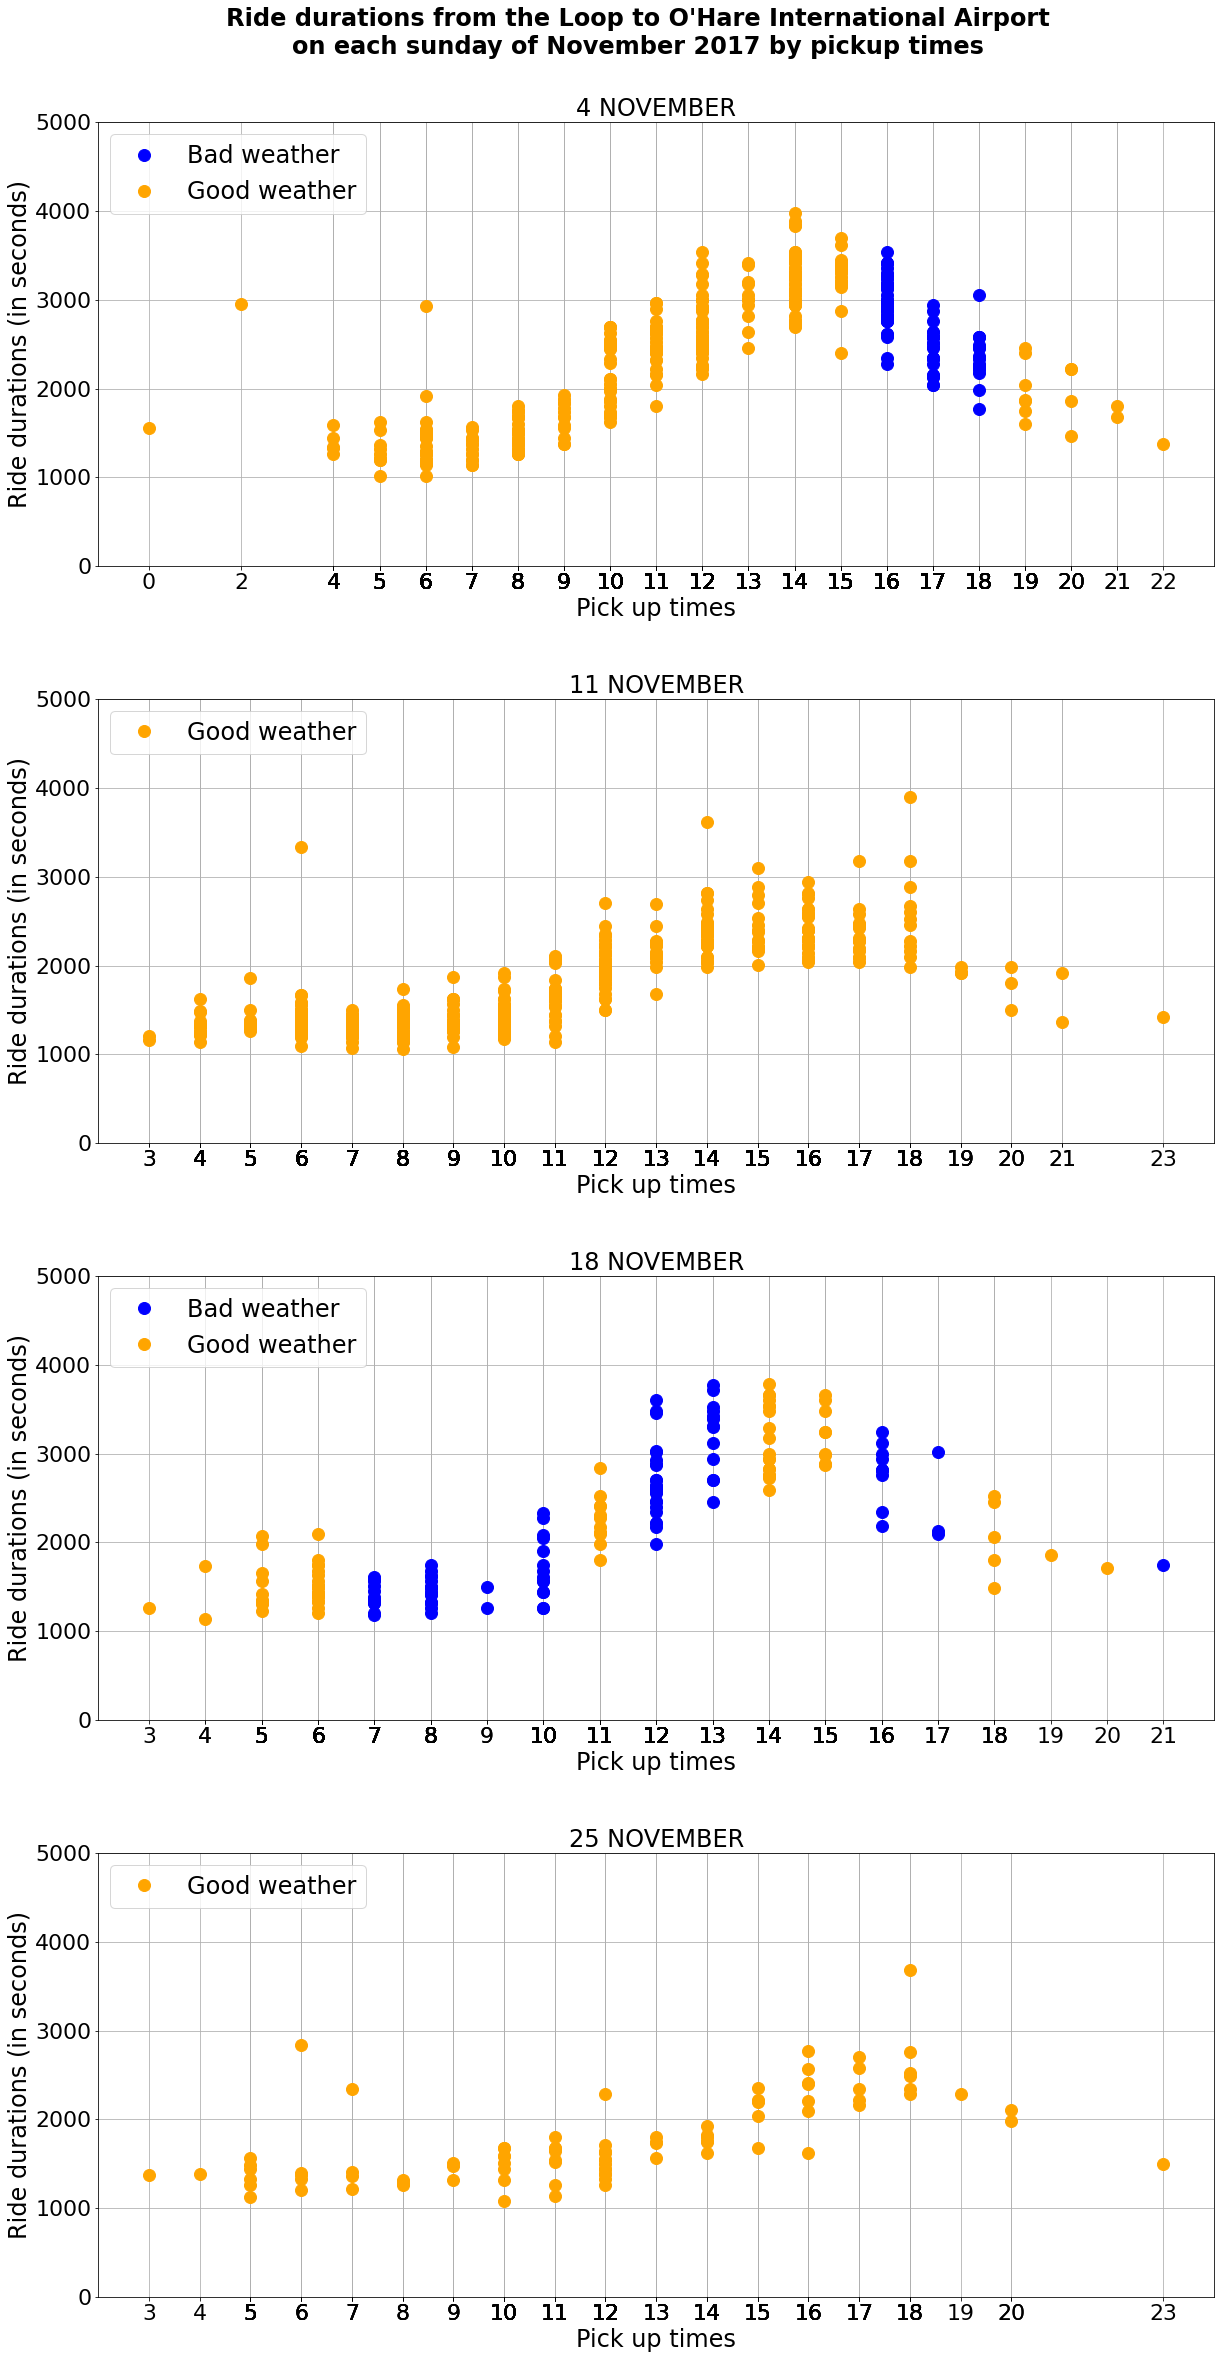

In [20]:
# Generate plot of hourly ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

groups_1 = result_07_typ.groupby(by='start_date')

colors = {'Good':'orange', 'Bad':'blue'}

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
                label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24, loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)
    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()



We can observe from the plot that the afternoon rides tend to last in general longer in duration. We had already mentioned in the previous subsection that we suspect in-clusters variations might be caused by peak hours. We also observe that the last sunday of the month, except few cases, the ride durations were more uniform (but it can also be that we have less data for the last Sunday). In addition, we can see that we actually haven't got rid of all statistical outliers, i.e., longer than usual rides. Take the last Sunday 6:00 am rides. One ride took more than 1000 seconds (17 minutes more) than all the other rides. As we mentioned previously, this could be due to the ride being shared by multiple clients. To make sure we only include typical rides, we should also remove these points before we compute the average ride durations for each hour. 

Some outlier detection algorithm could have been useful, but since we have only few more points to remove and they can be visually detected from the plots, we will simply drop them manually.

In [21]:
# Drop outliers from 4 November
# Rides taking more than 2500 seconds at 02:00 and 06:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07['start_date'] == 4) 
                                                      & (result_07_typ['start_time'].isin([2, 6])) &
                                                      (result_07['duration_seconds'] > 2500)].index))


    

# Drop outliers from 11 November
# rides taking more than 3000 seconds at 06:00, 14:00, 17:00, and 18:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 11) 
                                                      & (result_07_typ['start_time'].isin([6, 14, 17, 18])) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

# Drop outliers from 25 November
# rides taking more than 2000 seconds at 06:00, 07:00, and 12:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'].isin([6, 7, 12])) &
                                                      (result_07_typ['duration_seconds'] > 2000)].index))
# Rides taking more than 3000 seconds at 18:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'] == 18) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

result_07_typ.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1039 non-null   datetime64[ns]
 1   weather_conditions  1039 non-null   object        
 2   duration_seconds    1039 non-null   float64       
 3   start_date          1039 non-null   int64         
 4   start_time          1039 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.7+ KB


Next, we compute the hourly average ride durations for each Sundays separetely. Note that by taking separate averages for each Sunday, we compute an estimate of the hourly average ride durations with all external conditions being (almost) identical.

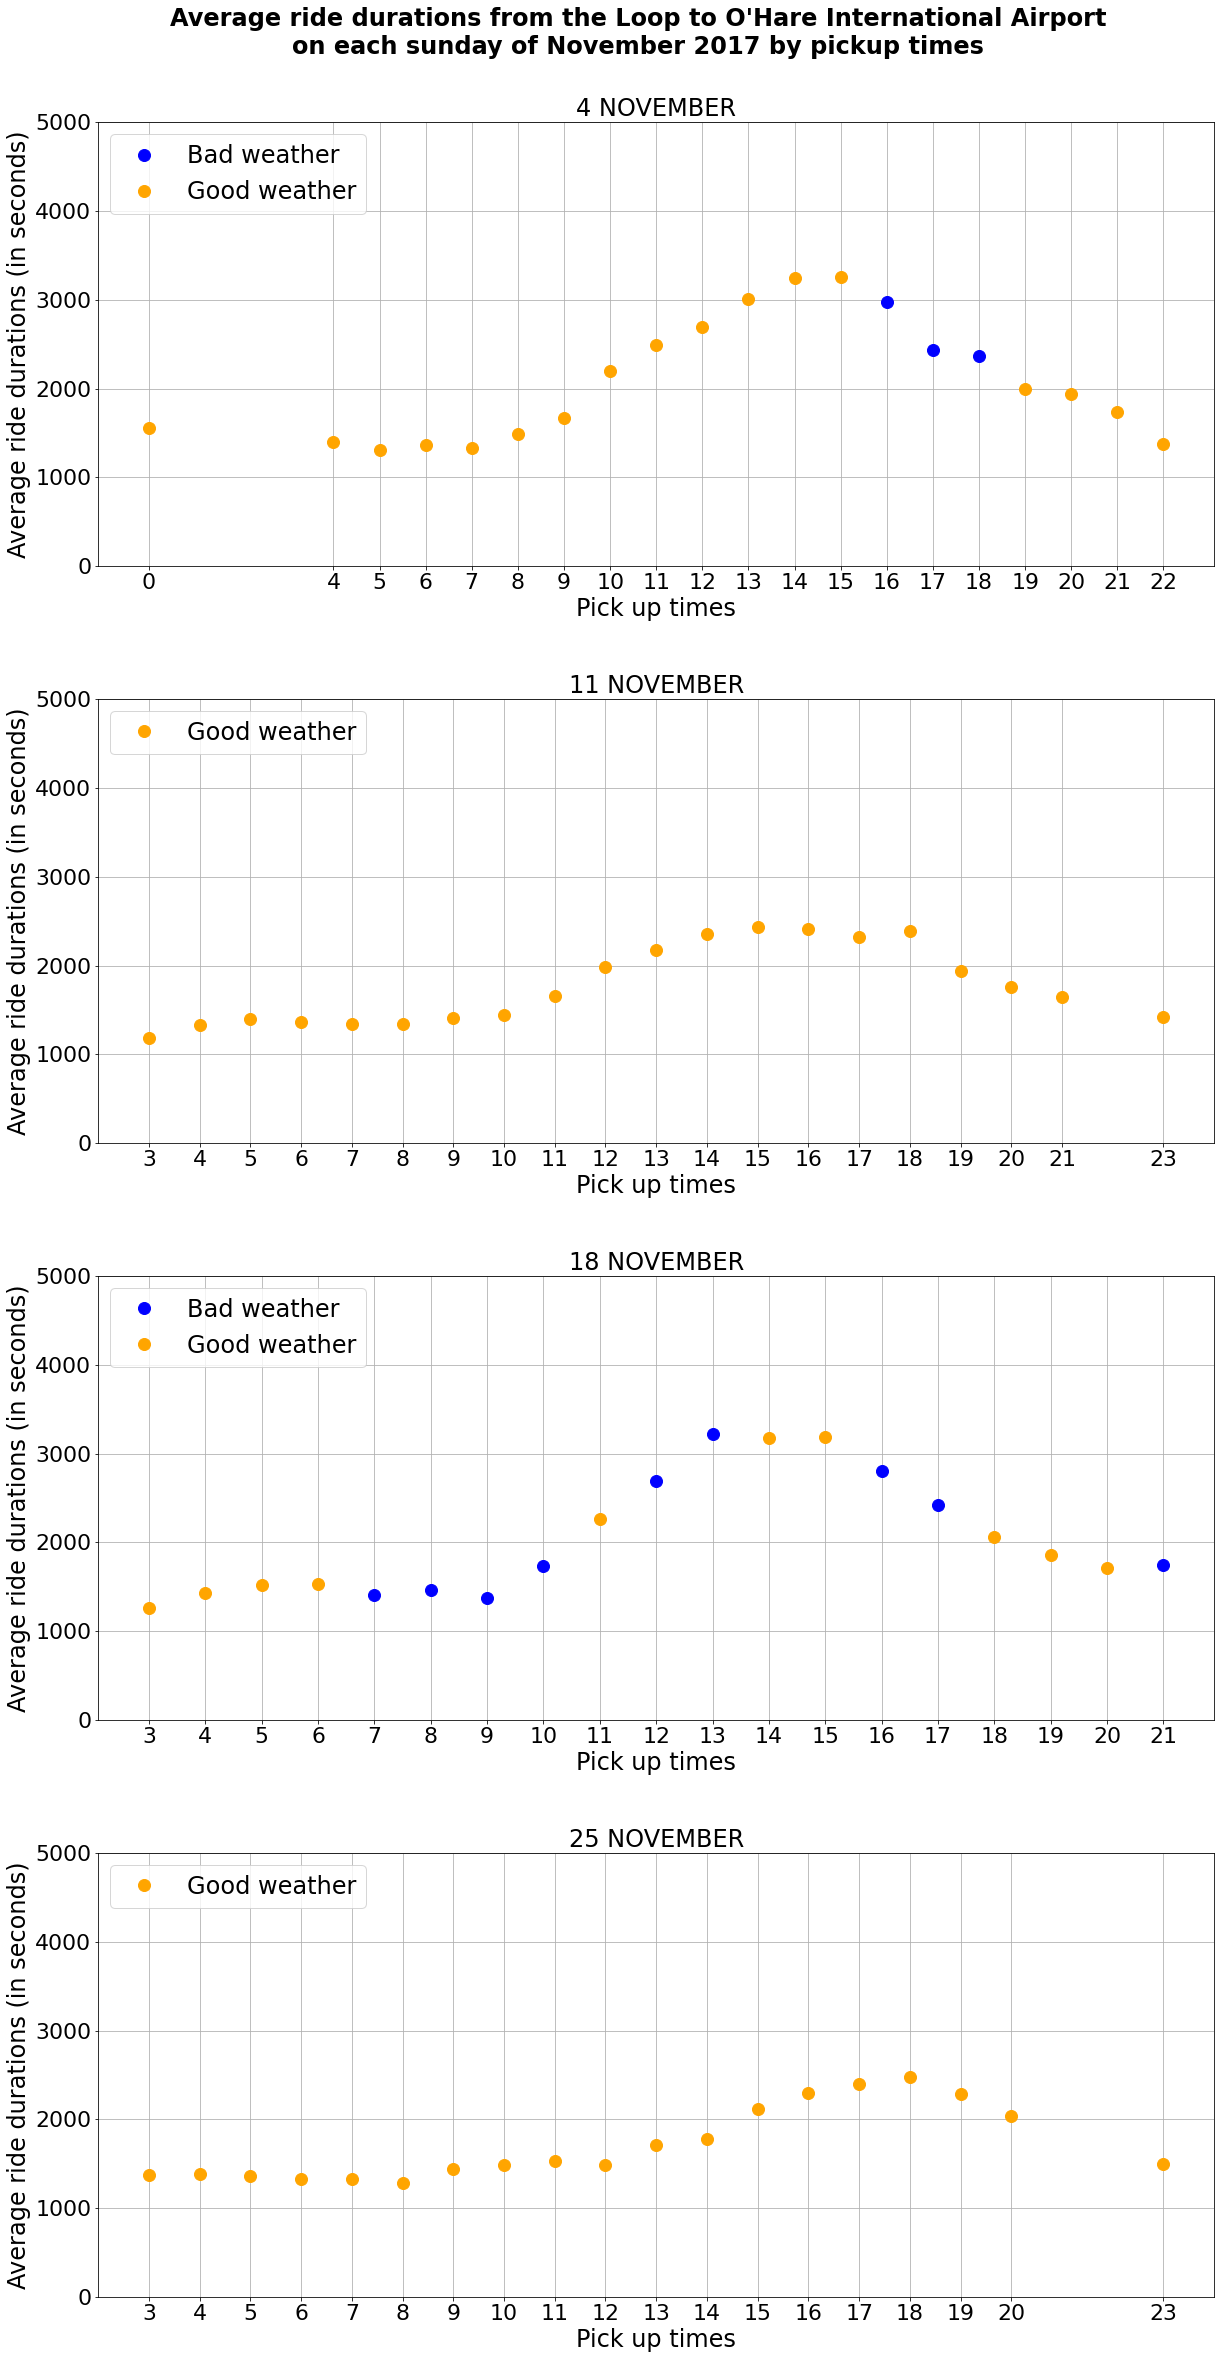

In [22]:
# Generate plot of hourly average ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

result_07_typ_averaged = result_07_typ.groupby(by=['start_date', 'start_time']).agg(
    {'duration_seconds':'mean', 'weather_conditions':'max'}).reset_index()

colors = {'Good':'orange', 'Bad':'blue'}


# Set the value of the maximum number of rows that can be displayed to 100.
pd.set_option('display.max_rows', 100)

groups_1 = result_07_typ_averaged.groupby(by='start_date')

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
               label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24,  loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Average ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)

    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Average ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()


Let us now formally test our hypothesis. One option would have been to perform multiple independent tests (without any averaging), one for each hour where we have both good and bad weather samples. However, we only have a limited number of samples for each hour. Instead, we suggest to perform a paired sample t-test. This test is used to determine whether the mean difference between two sets of observations is zero. It is used a lot in clinical studies, but we find it is also appropriate to use the test in our case. Here is how we think of our paired samples. We take the mean of the hourly average ride durations we found for Sundays 4 and 18 November. Since the weather turned out to be bad at some times on these Sundays, these mean values give us our first set of bad weather Sunday samples. We repeat the same for Sundays 11 and 25 November to get our good weather Sunday samples. We think of our bad and good weather Sunday mean of hourly average ride duration samples as two hourly paired measurements taken at different weather conditions. The null hypothesis now foresee that the true mean difference between the paired samples is zero, such that all observable differences are explained by random variation. Conversely, the alternative hypothesis assumes that the true mean difference between the paired samples is not equal to zero. For the paired sample t-test we only need to set the alpha value, which we set once again to 5%.

In [23]:
# Test hypothesis

# Filter data to get the bad weather samples
results_bad = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([4, 18])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_bad = results_bad.iloc[1:-1]

# Filter data to get the good weather samples
results_good = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([11, 25])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_good = results_good.iloc[:-1]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
# results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
results = st.ttest_rel(sample_1, sample_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

p-value:  0.006082828154971968
We reject the null hypothesis


Here the p-value tells us that there is 0.6% probability of obtaining a result like the one that was observed if the null hypothesis was true. Hence, we reject the null hypothesis and conclude that the mean of the hourly average ride durations for bad weather Sundays differ significantly from the ones for good weather Sundays. 

**Concluding remarks** In this step, we performed two hypothesis tests to formally test the dependency of the ride durations on weather conditions. First, we filtered the data only according to Bad and Good weather conditions to generate our two sets of test samples. However, we discussed the potential limitation of this approach and we found out that the peak hours led to variations in the ride durations as well. Thus, we decided to perform a second test, by pairing the hourly means of the hourly average ride durations for the first and third Sundays of the month with the hourly means of those for the second and fourth Sundays of the month. We summarize the result of the test in the Step 6.

<a class="anchor" id="step6"></a> 
### Step 6 General conclusion

In this project, we analyzed ride-sharing data from Sundays of November 2017. As usual, we began by doing the necessary data pre-processing to prepare our data for analysis. As a first task we focused on identifying our most successful business partners, i.e., taxi companies, and our target clients' profile/preferences. We discovered that taxi affiliate networks and associations were our top business partners as per their number of rides. In particular, the Flash Cab company sat at the top, with almost double the number of rides of its successor Taxi affiliation Aservices. As for our clients, we found out that close to one fifth of them ride to the Loop neighborhood. Quoting from Wikipedia, one can further learn about the neighborhood as "a vibrant area featuring eclectic eateries, shops, theaters and parks, that is comprised mostly of high-rises". 

As a second task, we studied the dependecy of the ride durations on the weather conditions. The scatter plots of ride durations for each Sunday of November 2017 showed us that there were both in-cluster variations in ride durations and the upper ride duration limits varied between the clusters. To take a closer look at what is happening, we generated various plots showing the hourly ride durations and their averages for each Sundays. This helped us to see that in-cluster rides durations, i.e., those for a given Sunday, varied according to peak hours witht he afternnon rides having a tendency to take longer. This pattern happened both in Good and Bad weather conditions. On the other hand, we noticed that the Sundays in which the whether happened to be Bad (rainy at some times of the day) seemed to lead to longer ride durations in the peak hours, but not necessarily outside of the peak afternoon hours. These were at the root of the observed upper limit variations of ride durations among the clusters. The hypothesis test we performed revealed that the hourly means of the hourly average ride durations for bad weather Sundays differ indeed from the hourly means of the good weather Sundays. One possible explanation we can come up with (based on the graphs we plotted) is as follows. When a day is forecasted to be bad, for instance rainy, many people might prefer to use private transports, be their own car or taxis. Then, non-peak traffic hour ride durations may not be affected significantly even if it rains. Conversely, even if it does not rain the whole day or during the entire peak hours, the already longer ride durations at peak traffic hours will tend to last even longer. In other words, bad weather itself could certainly slow down rides, but its impact is felt most significantly during peak hours.